# Assignment 2 

In this assignment, you will try to find groups of similar customers in the dataset included in the uploaded folder. The dataset contains information about credit card behaviour of customers.  


### 1. Importing required libraries

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import  silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import seaborn as sns
from IPython.display import HTML, display
from sklearn.neighbors import NearestCentroid

### 2. Reading the dataset

In [54]:
dataset = pd.read_csv('CC GENERAL.csv')
dataset.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### 3. Basic pre-processing

In [55]:
data = dataset.drop('CUST_ID', axis=1)
data.head()
data.fillna(method ='ffill', inplace = True)

### Scale the data 

In [56]:
# scaling 
mms=MinMaxScaler()
data[:] = mms.fit_transform(data[:])

In [57]:
data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.002148,0.818182,0.001945,0.000000,0.00424,0.000000,0.166667,0.000000,0.083333,0.000000,0.00000,0.005587,0.031720,0.003979,0.001826,0.000000,1.0
1,0.168169,0.909091,0.000000,0.000000,0.00000,0.136685,0.000000,0.000000,0.000000,0.166667,0.03252,0.000000,0.232053,0.080893,0.014034,0.222222,1.0
2,0.131026,1.000000,0.015766,0.018968,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.033520,0.248748,0.012264,0.008210,0.000000,1.0
3,0.087521,0.636364,0.030567,0.036775,0.00000,0.004366,0.083333,0.083333,0.000000,0.055555,0.00813,0.002793,0.248748,0.000000,0.008210,0.000000,1.0
4,0.042940,1.000000,0.000326,0.000393,0.00000,0.000000,0.083333,0.083333,0.000000,0.000000,0.00000,0.002793,0.038397,0.013374,0.003204,0.000000,1.0


## 4. Finding groups

### Approach 1 [ 1.5 + 3.5 marks ] 

Plot the dendrograms for the above scaled dataset points. (hint: use scipy.cluster.hierarchy imported above). 
Plot using the following parameters:
1. ward
2. complete
3. average <br> 
Study the dendrograms and comment on the major differences between them.

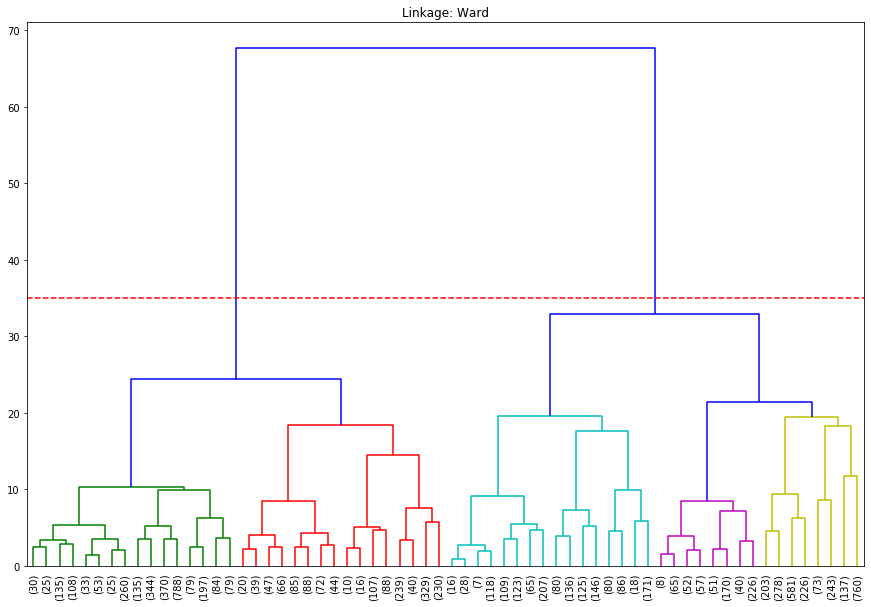

In [58]:
#Ward
Z=sch.linkage(data,method='ward')
plt.figure(figsize=(15,10))
sch.dendrogram(Z,leaf_rotation=90,p=5,color_threshold=20,leaf_font_size=10,truncate_mode='level')
plt.axhline(y=35, color='r', linestyle='--')
plt.title("Linkage: Ward")
plt.show()

## The optimal no. of clusters is 2 based on the above

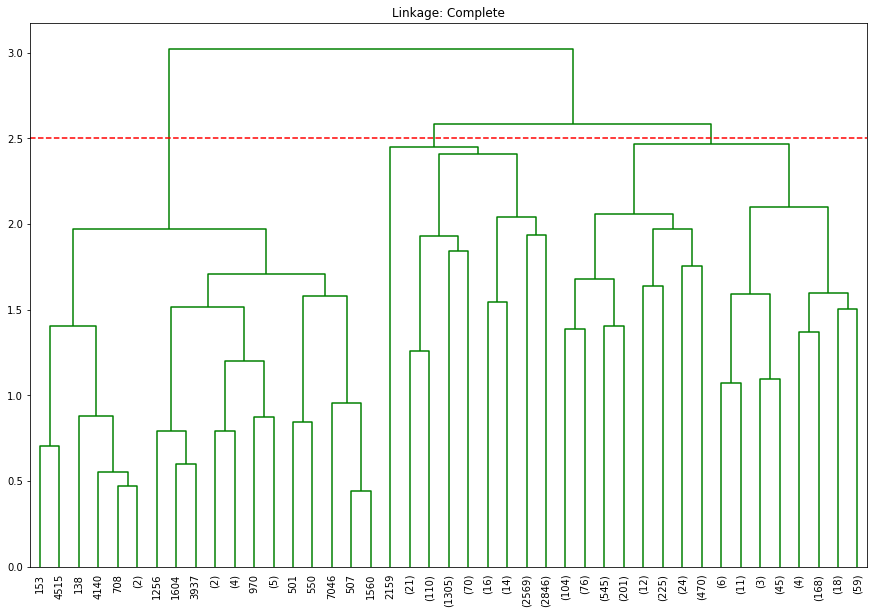

In [59]:
#Complete
Z=sch.linkage(data,method='complete')
plt.figure(figsize=(15,10))
sch.dendrogram(Z,leaf_rotation=90,p=5,color_threshold=20,leaf_font_size=10,truncate_mode='level')
plt.axhline(y=2.5, color='r', linestyle='--')
plt.title("Linkage: Complete")
plt.show() 

## The optimal no. of clusters is 3 based on the above

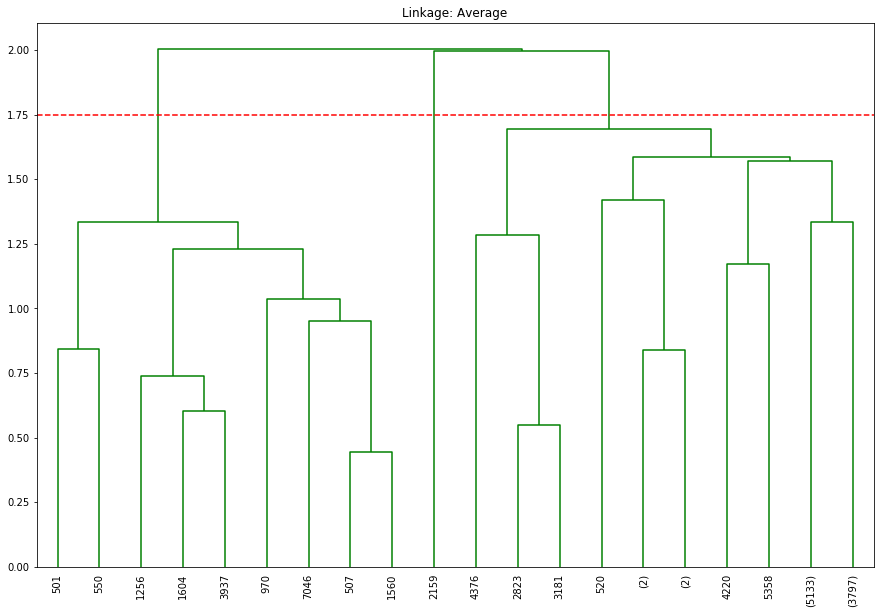

In [60]:
#Average
Z=sch.linkage(data,method='average')
plt.figure(figsize=(15,10))
sch.dendrogram(Z,leaf_rotation=90,p=5,color_threshold=20,leaf_font_size=10,truncate_mode='level')
plt.axhline(y=1.75, color='r', linestyle='--')
plt.title("Linkage: Average")
plt.show() 

## The optimal no. of clusters is 3 based on the above

With the help of dendrograms obtained above, choose a suitable **k** for each linkage type. Experiment with different distance measures as mentioned below: <br>
1. Euclidean 
2. Manhattan 
3. Cosine <br> 
Calculate the cluster quality for each case and report your results in an organized, tabular format. The table should have the parameters used, cluster means and cluster quality.  

In [66]:
# clustering (hint: Use AgglomerativeClustering imported above)
options = { 'ward': 2, 'complete': 3, 'average': 3 }
results = []
centroids = []

for linkage in options.keys(): 
    no_of_clusters = options[linkage] 
    # Euclidian for ward, complete and average linkages
    euclidean_model = AgglomerativeClustering(n_clusters=no_of_clusters, affinity='euclidean', linkage=linkage)
    euclidean_model.fit(data)
    euclidean_labels = euclidean_model.labels_
    silhouette_avg = silhouette_score(data, euclidean_labels)
    
    y_predict = euclidean_model.fit_predict(data)
    clf = NearestCentroid()
    clf.fit(data, y_predict)
 
    for idx, centroid in enumerate(clf.centroids_):
        centroids.append( ((linkage,'euclidean', idx+1) +  tuple(centroid) ) )
   
    results.append((linkage, no_of_clusters, 'euclidean', silhouette_avg ))
    
    # Adding this condition since Manhattan distance metric doesn't work for ward.
    if(linkage != 'ward') :
        # Manhattan for ward, complete and average linkages
        manhattan_model = AgglomerativeClustering(n_clusters=no_of_clusters, affinity='manhattan', linkage=linkage)
        manhattan_model.fit(data)
        manhattan_labels = manhattan_model.labels_
        silhouette_avg = silhouette_score(data, manhattan_labels)
        
        y_predict = manhattan_model.fit_predict(data)
        clf = NearestCentroid()
        clf.fit(data, y_predict)
    
        for idx, centroid in enumerate(clf.centroids_):
            centroids.append( ((linkage,'manhattan', idx+1) +  tuple(centroid) ) )
 
        results.append((linkage, no_of_clusters,  'manhattan', silhouette_avg ))
        
        # Cosine for ward, complete and average linkages
        cosine_model = AgglomerativeClustering(n_clusters=no_of_clusters, affinity='cosine', linkage=linkage)
        cosine_model.fit(data)
        cosine_labels = cosine_model.labels_
        silhouette_avg = silhouette_score(data, cosine_labels)
        
        y_predict = cosine_model.fit_predict(data)
        clf = NearestCentroid()
        clf.fit(data, y_predict)
        
        for idx, centroid in enumerate(clf.centroids_):
            centroids.append( ((linkage,'cosine', idx+1) +  tuple(centroid) ) )
  
        results.append((linkage, no_of_clusters,  'cosine', silhouette_avg ))

#### Cluster Means

In [67]:
df = pd.DataFrame(centroids, columns = ['Linkage','Distance Measure','Cluster Number'] + list(data.columns))
df.reset_index(drop=True, inplace=True) 
display( df )  

,Linkage,Distance Measure,Cluster Number,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,ward,euclidean,1,0.070976,0.926940,0.034167,0.022962,0.032892,0.011886,0.835361,0.322494,0.660262,0.052779,0.015932,0.073201,0.156960,0.037943,0.011091,0.231945,0.929456
1,ward,euclidean,2,0.094433,0.822710,0.005397,0.005277,0.002208,0.030522,0.111365,0.070601,0.039481,0.131088,0.037926,0.005815,0.138984,0.030025,0.011579,0.067780,0.908675
2,complete,euclidean,1,0.039566,0.936301,0.035003,0.025820,0.029529,0.008142,0.878286,0.427179,0.592679,0.040015,0.010353,0.069463,0.161149,0.036387,0.005067,0.492070,0.856334
3,complete,euclidean,2,0.392988,0.989562,0.491768,0.456733,0.244405,0.019818,0.974691,0.887654,0.825926,0.057613,0.025896,0.393027,0.559760,0.456179,0.045356,0.438973,0.987654
4,complete,euclidean,3,0.093022,0.860099,0.014503,0.009617,0.014199,0.024349,0.378484,0.136085,0.297935,0.104421,0.030968,0.031678,0.143180,0.031902,0.012965,0.056678,0.937212
5,complete,manhattan,1,0.079017,0.876154,0.018102,0.012495,0.016832,0.020159,0.485395,0.196134,0.359083,0.089248,0.025793,0.038368,0.145104,0.031499,0.010963,0.152967,0.918774
6,complete,manhattan,2,0.385613,0.997855,0.239990,0.199276,0.162056,0.063130,0.988492,0.825298,0.911185,0.163943,0.073353,0.310840,0.453753,0.259484,0.044069,0.216505,0.992509
7,complete,manhattan,3,0.237970,0.709091,0.283484,0.338267,0.005055,0.342399,0.400000,0.316667,0.116667,0.277778,0.289431,0.058659,0.539900,0.754354,0.066930,0.360000,1.000000
8,complete,cosine,1,0.104976,0.897245,0.003097,0.003209,0.000937,0.036757,0.065058,0.044243,0.019982,0.160321,0.046917,0.003281,0.135826,0.031001,0.012317,0.083955,0.900777
9,complete,cosine,2,0.048348,0.911133,0.028035,0.013777,0.036165,0.009828,0.910689,0.205300,0.794587,0.044203,0.012323,0.067756,0.140129,0.031483,0.010674,0.369921,0.869846


#### Cluster Quality

In [68]:
df = pd.DataFrame(results, columns =['Linkage', 'No. of Clusters', 'Distance Measure', 'Silhouette Score']) 
df.reset_index(drop=True, inplace=True) 
df.head(20)

,Linkage,No. of Clusters,Distance Measure,Silhouette Score
0,ward,2,euclidean,0.356759
1,complete,3,euclidean,0.231260
2,complete,3,manhattan,0.242713
3,complete,3,cosine,0.192860
4,average,3,euclidean,0.430040
5,average,3,manhattan,0.454188
6,average,3,cosine,0.190959


### Approach 2 [ 3 marks] 
Solve the same problem using a density based approach. Experiment with the following values of eps and minpts:<br> 
1. eps = 0.1, min_pts = 5
2. eps = 0.5, min_pts = 3
3. eps = 0.8, min_pts = 5 <br>
Analyze the results and comment on how the clustering changes as the above parameters are varied. Report the cluster quality for all the cases using the same measure as used for approach 1. Report results in a tabular format with parameters used, number of noise and core points and cluster quality. 

## 5. Visualization [ 2 marks ] 
To visualize the clusters, reduce the data to 2 dimensions using PCA. Make a scatterplot with different colours for each cluster obtained. Make one visualization each for approach 1 and 2 (the parameters which gave the best cluster quality for each). 